# Import Dataset

In [1]:
from urllib.request import urlretrieve

In [2]:
import pandas as pd 

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/postoperative-patient-data/post-operative.data'

In [4]:
urlretrieve(url, 'post-operative.data')

('post-operative.data', <http.client.HTTPMessage at 0x112c5b630>)

In [5]:
header = ['L-C','L-S','L-O','L-B','S-STBL','C-STBL','B-STBL','COMFORT','ADM-DECS']
df = c = pd.read_csv('post-operative.data',names = header,comment = '#')

In [6]:
print(df.head())

    L-C   L-S        L-O   L-B  S-STBL    C-STBL      B-STBL COMFORT ADM-DECS
0   mid   low  excellent   mid  stable    stable      stable      15        A
1   mid  high  excellent  high  stable    stable      stable      10        S
2  high   low  excellent  high  stable    stable  mod-stable      10        A
3   mid   low       good  high  stable  unstable  mod-stable      15       A 
4   mid   mid  excellent  high  stable    stable      stable      10        A


# Preprocessing

In [7]:
import numpy as np

In [8]:
df = df.replace('?', np.nan)

Missing data originally appears as ? in the table. In order to continue with preprocessing, those question marks must be turned into 'NaN' using np.nan.

In [9]:
df = df.dropna(thresh=9)

Delete all data that has missing values. I decided to delete this data because there were only 4 rows with missing data, so deleting did not remove very much of the data. If there were many more rows with missing data, I would have instead imputed.

In [10]:
df

,L-C,L-S,L-O,L-B,S-STBL,C-STBL,B-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
5,high,low,good,mid,stable,stable,unstable,15,S
6,mid,low,excellent,high,stable,stable,mod-stable,05,S
7,high,mid,excellent,mid,unstable,unstable,stable,10,S
8,mid,high,good,mid,stable,stable,stable,10,S
9,mid,low,excellent,mid,unstable,stable,mod-stable,10,S


In [11]:
comf_mapping = {'05':5, '07':7, '10':10, '15':15}

Python does not read the imported Comfort data as numerical, even though it is. Therefore, it must be converted into actual numerical data that Python can use for graphing.

In [12]:
df['COMFORT'] = df['COMFORT'].map(comf_mapping)

Changing the Comfort column into the numerical data.

In [13]:
df = df.replace("A ","A")

One row has "A " in the ADM-DECS category. This must be replaced by "A" in order for all A values to belong to the same category in the plot below.

# Plotting

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

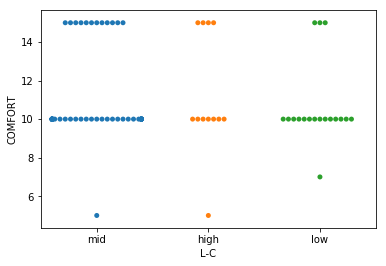

In [15]:
sns.swarmplot(x=df['L-C'], y=df['COMFORT'])

The distribution of comfort is fairly similar for all 3 categories of internal temperature. The majority of patients in all internal temperature categories rated comfort as a 10, with some as a 15 and very few below 10. The "mid" group has the most data, while the "high" group has the most similar amount of people rating comfort at a 10 versus rating at a 15. Overall, not much difference is seen in comfort level ratings between internal temperature groups.

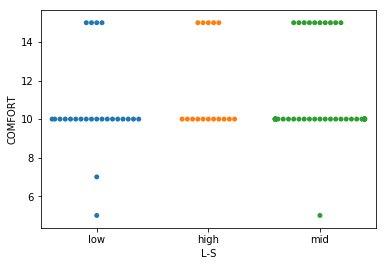

In [16]:
sns.swarmplot(x=df['L-S'], y=df['COMFORT'])

The distribution of comfort is very similar for all 3 categories of surface temperature. The majority of patients in all internal temperature categories rated comfort as a 10, with some as a 15 and very few below 10. The "mid" and "low" groups had similar amounts of data, while the "high" group had 0 patients rate their comfort level below a 10 at discharge. Overall, not much difference is seen in comfort level ratings between surface temperature groups.

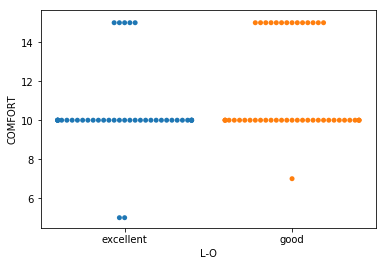

In [17]:
sns.swarmplot(x=df['L-O'], y=df['COMFORT'])

The distribution of comfort is extremely similar for both categories of oxygen saturation. The majority of patients in both oxygen saturation categories rated comfort as a 10. The "excellent" category has less people rating comfort level at 15, with 2 lower comfort ratings than in the whole "good" category. Overall, not much difference is seen in comfort level ratings between "excellent" and "good" oxygen saturation groups. There were no patients included in this plot with "fair" or "poor" oxygen saturation levels.

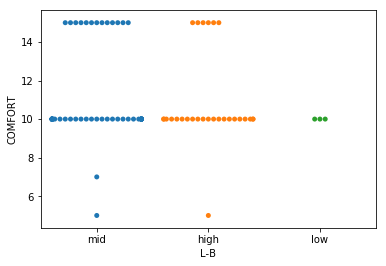

In [18]:
sns.swarmplot(x=df['L-B'], y=df['COMFORT'])

The distribution of comfort is very similar for "mid" and "high" categories of blood pressure. The "low" category only has 3 data points, all lying at the comfort rating of 10. The "mid" group has 1 more patient rating comfort below 10 than the "high" group, while the "high" group has fewer patients rating comfort at discharge at 15. The "low" category does not have enough data to draw a conclusive relationship between it and the other 2 categories.

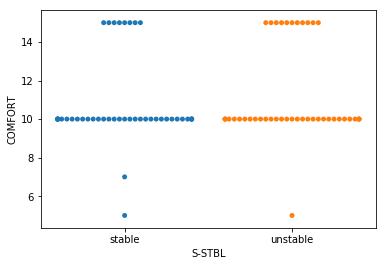

In [19]:
sns.swarmplot(x=df['S-STBL'], y=df['COMFORT'])

The distribution of comfort is extremely similar for both categories of surface temperature stability. The majority of patients in both surface temperature categories rated comfort as a 10, with some as a 15 and very few below 10. The "stable" group has 1 more comfort rating below 10 than the "unstable" group. However, the amount of patients rating comfort as 15 is similar for both the "stable" and "unstable" categories.

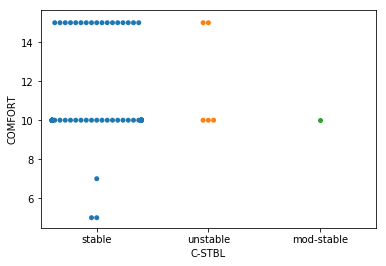

In [20]:
sns.swarmplot(x=df['C-STBL'], y=df['COMFORT'])

There is not enough data in the "unstable" or "mod-stable" categories to draw comparisons between all categories of core temperature stability. The "stable" category contains a great majority of the data, while also having a similar amount of patients rating comfort at 10 and 15. In addition, the "stable" group has 3 comfort ratings below 10, while the "unstable" and "mod-stable" groups do not have any.

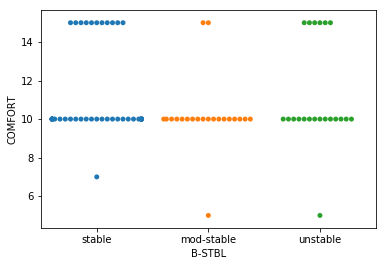

In [21]:
sns.swarmplot(x=df['B-STBL'], y=df['COMFORT'])

The distribution of comfort is fairly similar for all 3 categories of blood pressure stability. The majority of patients in all stability categories rated comfort as a 10, with some as a 15 and very few below 10. Each category has 1 patient rating comfort below 10. The "mod-stable" group has less patients rating comfort at 15 than the other 2 groups. Overall, not much difference is seen in comfort level ratings between blood pressure stability groups.

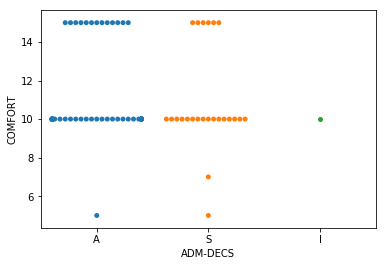

In [22]:
sns.swarmplot(x=df['ADM-DECS'], y=df['COMFORT'])

The distribution of comfort is fairly similar for the "A" and "S" categories. There is only one patient included in the plot that lies in the "I" category, which means this was the only patient sent to the Intensive Care Unit. The majority of patients in the plotted categories rated comfort as a 10, with some as a 15 and very few below 10. The "S" category has less data in the comfort levels of 10 and 15 compared to category "A". However, "S" contains 1 more patient with a comfort level below 10.

# Github Submit